# Context
- The field of philosophy has been plagued by various vices, with plagiarism being a prominent issue that undermines academic integrity. To address this problem, one effective approach is the implementation of "Authorship Attribution" techniques.
- Authorship attribution refers to the process of determining and assigning the correct author or source of a particular written document, text, or piece of content

# Objective
- The project aims to leverage advanced Natural Language Processing (NLP) techniques to develop an Authorship Attribution model by performing Text Classification, so as to uncover valuable insights into the writing styles, perspectives, and philosophies of 2 major authors, Plato and Aristotle.

# Data Overview
- The dataset was obtained from Kaggle.
- It contains over 87,000 sentences from over 50 texts spanning by 2 major authors, which are Plato and Aristotle.


# Import relevant packages

In [ ]:
#for reading data
import pandas as pd

#for numerical computaions
import numpy as np

#for visualization
import matplotlib.pyplot as plt
import seaborn as sns

#for text preprocessing and cleaning
import re #data cleaning and remove unwanted characters
import nltk #to remove stopwords, implement lematization and tokenization
import string #to clean data
#import contractions #to clean texts
#import unidecode, unicodedata #to remove non-ascii characters


#to display wordcloud
from wordcloud import WordCloud, STOPWORDS

#for visualization
import matplotlib.pyplot as plt
import seaborn as sns

#to show max width
pd.set_option('max_colwidth', None)

# Helps to display the images
from PIL import Image #pillow library

#to implement sparse vectorization
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

#for spliting data into test, validation and train
from sklearn.model_selection import train_test_split

#for decision tree and ensemble modeling
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import StackingClassifier, RandomForestClassifier, GradientBoostingClassifier

#for metrics evaluation
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report

import tensorflow as tf
import keras
from tensorflow.keras.models import Sequential #for adding layers
from tensorflow.keras.layers import Input, Dropout, TextVectorization, Dense, SimpleRNN, LSTM, Embedding #for different layers


from tensorflow.keras.optimizers import Adam, SGD #import optimizers
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint #to save best performing model and help prevent overfiting
from tensorflow.keras.utils import to_categorical #to categorize each class of the target
from tensorflow.keras.preprocessing.text import Tokenizer #to tokenize the texts
from tensorflow.keras.preprocessing.sequence import pad_sequences #to enforce uniform length of data



# Mount Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


# EDA
# Read the data

In [ ]:
def data_reader(url):
  """
  reads or load the data with specifies url
  url: path
  """
  import pandas as pd
  data = pd.read_csv(url)
  return data

In [ ]:
#read the data
path = '/content/drive/MyDrive/authorship_attribution_project/dsmp_dataset'
df = data_reader(path)

In [ ]:
df.head()

,Unnamed: 0,title,school,sentence_spacy,sentence_str,original_publication_date,corpus_edition_date,sentence_length,sentence_lowered,tokenized_txt,lemmatized_str,author
0,69835,Aristotle - Complete Works,aristotle,"Why is it that some men become ill when, after having been accustomed to live intemperately, they adopt a temperate mode of life?","Why is it that some men become ill when, after having been accustomed to live intemperately, they adopt a temperate mode of life?",-320,1991,129,"why is it that some men become ill when, after having been accustomed to live intemperately, they adopt a temperate mode of life?","['why', 'is', 'it', 'that', 'some', 'men', 'become', 'ill', 'when', 'after', 'having', 'been', 'accustomed', 'to', 'live', 'intemperately', 'they', 'adopt', 'temperate', 'mode', 'of', 'life']","why be -PRON- that some man become ill when , after have be accustom to live intemperately , -PRON- adopt a temperate mode of life ?",Aristotle
1,65294,Aristotle - Complete Works,aristotle,"It is said that some of the Ligurians sling so skilfully that, when they see several birds, they contend with one another about which bird each is preparing to strike, presuming that all will easily hit their mark.","It is said that some of the Ligurians sling so skilfully that, when they see several birds, they contend with one another about which bird each is preparing to strike, presuming that all will easily hit their mark.",-320,1991,214,"it is said that some of the ligurians sling so skilfully that, when they see several birds, they contend with one another about which bird each is preparing to strike, presuming that all will easily hit their mark.","['it', 'is', 'said', 'that', 'some', 'of', 'the', 'ligurians', 'sling', 'so', 'skilfully', 'that', 'when', 'they', 'see', 'several', 'birds', 'they', 'contend', 'with', 'one', 'another', 'about', 'which', 'bird', 'each', 'is', 'preparing', 'to', 'strike', 'presuming', 'that', 'all', 'will', 'easily', 'hit', 'their', 'mark']","-PRON- be say that some of the Ligurians sling so skilfully that , when -PRON- see several bird , -PRON- contend with one another about which bird each be prepare to strike , presume that all will easily hit -PRON- mark .",Aristotle
2,68527,Aristotle - Complete Works,aristotle,Why do those who are grieving and those who are enjoying themselves alike have the flute played to them?,Why do those who are grieving and those who are enjoying themselves alike have the flute played to them?,-320,1991,104,why do those who are grieving and those who are enjoying themselves alike have the flute played to them?,"['why', 'do', 'those', 'who', 'are', 'grieving', 'and', 'those', 'who', 'are', 'enjoying', 'themselves', 'alike', 'have', 'the', 'flute', 'played', 'to', 'them']",why do those who be grieve and those who be enjoy -PRON- alike have the flute play to -PRON- ?,Aristotle
3,85177,Aristotle - Complete Works,aristotle,A subject can be developed indefinitely along these lines.,A subject can be developed indefinitely along these lines.,-320,1991,58,a subject can be developed indefinitely along these lines.,"['subject', 'can', 'be', 'developed', 'indefinitely', 'along', 'these', 'lines']",a subject can be develop indefinitely along these line .,Aristotle
4,80966,Aristotle - Complete Works,aristotle,"And if the people are to be supreme because they are stronger than the few, then if one man, or more than one, but not a majority, is stronger than the many, they ought to rule, and not the many.","And if the people are to be supreme because they are stronger than the few, then if one man, or more than one, but not a majority, is stronger than the many, they ought to rule, and not the many.",-320,1991,195,"and if the people are to be supreme because they are stronger than the few, then if one man, or more than one, but not a majority, is stronger than the many, they ought to rule, and not the many.","['and', 'if', 'the', 'people', 'are', 'to', 'be', 'supreme', 'because', 'they', 'are

In [ ]:
df.author.unique()

array(['Aristotle', 'Plato'], dtype=object)

- there are 2 authors in the dataset, plato and aristotle

In [ ]:
df.columns

Index(['Unnamed: 0', 'title', 'school', 'sentence_spacy', 'sentence_str',
       'original_publication_date', 'corpus_edition_date', 'sentence_length',
       'sentence_lowered', 'tokenized_txt', 'lemmatized_str', 'author'],
      dtype='object')

- only 'author' 'sentence_spacy', are relevant for the scopy of the study.

In [ ]:
#make a copy of the data with selected columns[ 'author' 'sentence_spacy']
df = df[['author','sentence_spacy']].copy()

In [ ]:
df.head()#view top 5 rows

,author,sentence_spacy
0,Aristotle,"Why is it that some men become ill when, after having been accustomed to live intemperately, they adopt a temperate mode of life?"
1,Aristotle,"It is said that some of the Ligurians sling so skilfully that, when they see several birds, they contend with one another about which bird each is preparing to strike, presuming that all will easily hit their mark."
2,Aristotle,Why do those who are grieving and those who are enjoying themselves alike have the flute played to them?
3,Aristotle,A subject can be developed indefinitely along these lines.
4,Aristotle,"And if the people are to be supreme because they are stronger than the few, then if one man, or more than one, but not a majority, is stronger than the many, they ought to rule, and not the many."


In [ ]:
df.author.value_counts()#how many rows of data are for each author

Aristotle    38366
Plato        38366
Name: author, dtype: int64

- the data is balanced as there are equal sentences from both authors.

In [ ]:
#determine number of columns and rows
df.shape

(76732, 2)

- there are 76,732 rows and 2 columns in the data

In [ ]:
#check for duplicates
df.duplicated().sum()

0

- there are no duplicates in the data

In [ ]:
df.isnull().sum()

author            0
sentence_spacy    0
dtype: int64

# check for missing values

# NLP Text Preprocessing
the following cleaning method will be implemented
- Remove Contractions
- remove unwanted characters
- lowercase the reviews
- remove stopwords
- apply lematization
- display wordcloud view of frequent words



## Remove Contractions

In [ ]:
df.tail(10)

,author,sentence_spacy
76722,Plato,"I am moved by argument, and I know only this for sure: every soul is immortal, and also, when removed from this place, free from pain."
76723,Plato,"So whether above or below, Axiochus, you ought to be happy, if you have lived piously.'"
76724,Plato,"'I'm too embarrassed to say anything to you, Socrates."
76725,Plato,I'm so far from fearing death that now I actually passionately desire it.
76726,Plato,"That's how much I've been affected by this argument, as well as by the one about the heavens."
76727,Plato,"Now I despise life, since I'm moving to a better home. '"
76728,Plato,"And now I'd like to go over what you've said, quietly and by myself."
76729,Plato,"But after midday, Socrates, please visit me.'"
76730,Plato,I will do what you ask.
76731,Plato,"And now I'll go back to my walk to the Cynosarges, where I was going when I was summoned here.'."


In [ ]:
!pip install contractions

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 5.2 MB/s eta 0:00:00


In [ ]:
import contractions

In [ ]:
def contraction_remover(x):
    """
    this function fixes the contractions found in the sentence and returns a review with no contractions.
    x: feature
    data: dataframe
    """
    #data[x] = data[x].apply(contracti)
    fixed_x = contractions.fix(x)
    #fixed_reviews = contractions.fix(reviews)
    return fixed_x

In [ ]:
df['sentence_spacy'] = df['sentence_spacy'].apply(contraction_remover)

df['sentence_spacy'].tail(10)

76722    I am moved by argument, and I know only this for sure: every soul is immortal, and also, when removed from this place, free from pain.
76723                                                   So whether above or below, Axiochus, you ought to be happy, if you have lived piously.'
76724                                                                                   'I am too embarrassed to say anything to you, Socrates.
76725                                                                I am so far from fearing death that now I actually passionately desire it.
76726                                          That is how much I have been affected by this argument, as well as by the one about the heavens.
76727                                                                                 Now I despise life, since I am moving to a better home. '
76728                                                                And now I would like to go over what you have said, quietly and by 

## remove unwanted characters

In [ ]:
def sentence_cleaner(x):
    """
    this function removes unwanted characters such as: digits and punctuation marks, extra
    whitespaces & special charcatersfound in reviews.
    it will return only uppercase and lowecased alphabets.
    x: string of words
    """
    cleaned_x = re.sub(pattern = "[^a-zA-Z]", repl=" ", string=x) #removes digits and punctuation marks
    cleaned_x = re.sub(pattern = r'\s+', repl=" ", string=cleaned_x)#removes extra whitespaces and question
    return cleaned_x

In [ ]:
df['sentence_spacy'] = df['sentence_spacy'].apply(sentence_cleaner)

## lowercase the reviews

In [ ]:
def lowercaser(x):
    """
    returns a lowercased string of reviews.
    reviews: string of words
    """
    #step1: lowercase each word in the list of tokens
    lowercased_x = [word.lower() for word in x.split()]
    #step 2: join the words together
    text = " ".join(lowercased_x)
    #step 3: return text
    return text

In [ ]:
df['sentence_spacy'] = df['sentence_spacy'].apply(lowercaser)

## remove stopwords

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
#step1: import corpus
from nltk.corpus import stopwords

#step2: initialize stopwords found in the english languague so far
stopword = stopwords.words('english')

#step3: define a function to remove stopwords found in the sentence
def stopword_remover(x):
    """
    the function removes stopwords found in the review and returns the remaining word
    x: string of words
    """
    #remove the word if the word is a stopword
    cleaned_x = [text for text in x.split() if text not in stopword]

    #join the remiaining words back together
    cleaned_x = " ".join(cleaned_x)

    #return the cleaned_x
    return cleaned_x

#step4: apply the function to the review text
df["sentence_spacy"] = df.apply(lambda x: stopword_remover(x['sentence_spacy']), axis=1)

## apply lematization

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
#step1: import wordnetlemmatizer(wnl)
from nltk.stem import WordNetLemmatizer

#step2: initialize the wnl
lemm = WordNetLemmatizer()

#step3: define a function to apply lemmatization to words found in sentence
def lemmatize_sentence(x):
    """
    the function lemmatize the words in the sentence
    x: string of words
    """
    #lemmatize the word
    cleaned_x = [lemm.lemmatize(text) for text in x.split()]

    #join the remiaining words back together
    cleaned_x = " ".join(cleaned_x)

    #return the cleaned_x
    return cleaned_x

#step4: apply the function to the sentence_spacy
df["sentence_spacy"] = df.apply(lambda x: lemmatize_sentence(x["sentence_spacy"]), axis=1)

## Remove Punctuations

In [ ]:
def punctuation_remover(x):
    """
    removes any punctuation found in the sentence.
    x: string of words
    """
    cleaned_sentence = [word for word in x.split() if word not in string.punctuation]

    #join the remiaining words back together
    cleaned_sentence = " ".join(cleaned_sentence)

    return cleaned_sentence

In [ ]:
df["sentence_spacy"]= df["sentence_spacy"].apply(punctuation_remover)

In [ ]:
df.rename(columns={'sentence_spacy':'sentence'}, inplace=True)

# Display WordCloud

In [ ]:
def WordCloudDisp(data, author):
    """
    this function generates a word cloud based on the specified author
    data: dataframe
    author: specified author
    """
    #step1: define the category
    author = data[data['author'] == author] #this will return a subset of the data with specified author

    #step2: join the words in the text for the author
    joined_sentence = " ".join(author['sentence'])


    #step3: tokenize the words into a list of words
    tokens = " ".join([words for words in joined_sentence.split()])

    #step4: intialize the wordcloud
    wc = WordCloud(max_words=100,stopwords=STOPWORDS, random_state=14, width=3000, height=2500,).generate(tokens)

    #set the figure
    plt.figure(1, figsize=(12,12))

    #display the wordcloud image
    plt.imshow(wc, interpolation='bilinear')

    #off the axis
    plt.axis('off')

    #show the plot
    plt.show()

In [ ]:
#randomize the data
df = df.sample(n=len(df), random_state=0).reset_index(drop=True)

df.head()

,author,sentence
0,Plato,even harder take
1,Plato,said quite true
2,Plato,previous day also others used visit socrates
3,Aristotle,thinker make one contrary matter making unequal take essence plurality matter one equal others making plurality matter one
4,Aristotle,winter sun travel towards south beginning spring end autumn giving forth heat whereas summer sun travel towards north leaf region



## Display wordcloud for Plato's words

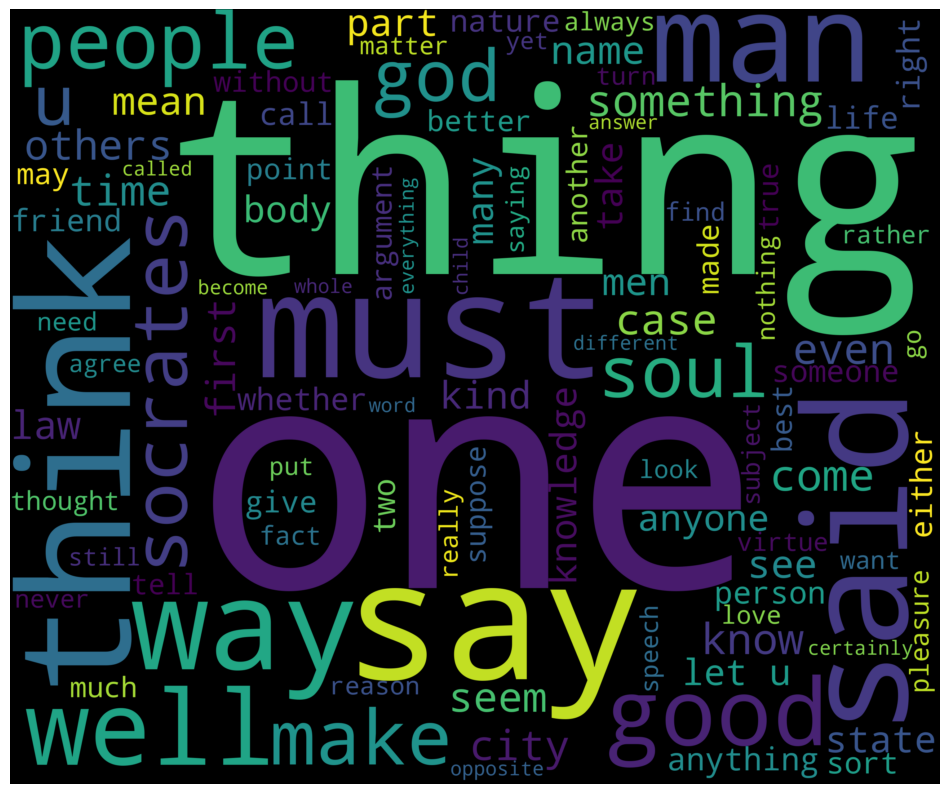

In [ ]:
wc1 = WordCloudDisp(df, 'Plato')
wc1


## Display wordcloud for Aristotle's words

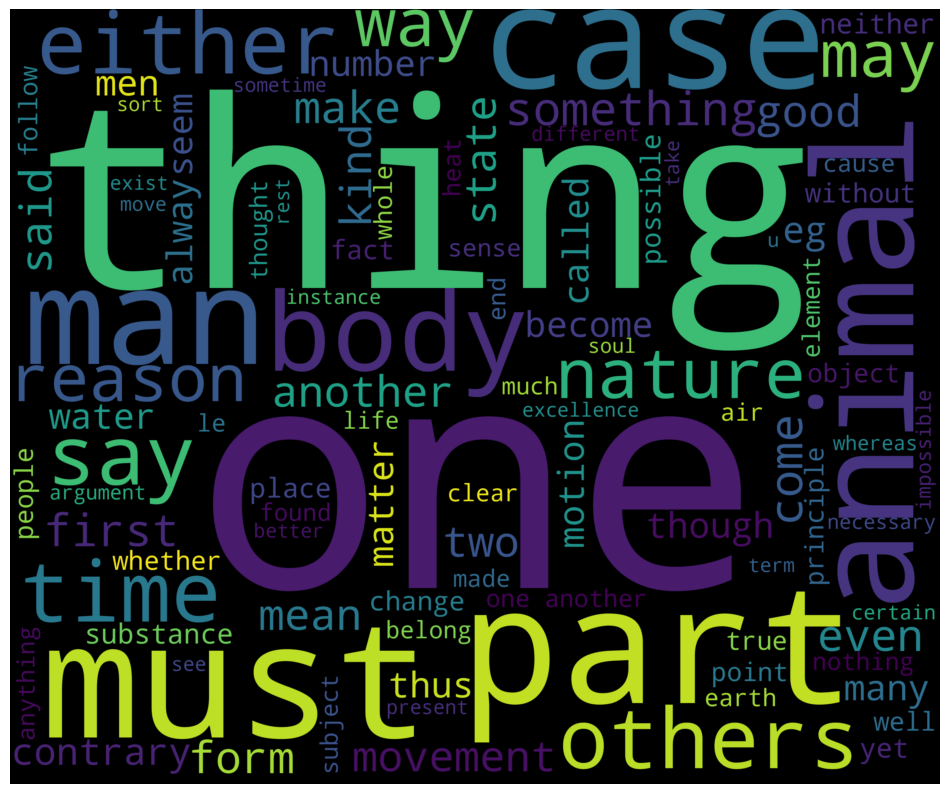

In [ ]:
wc2 = WordCloudDisp(df, 'Aristotle')
wc2

# encode the target

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Sample categorical labels
labels = ['Aristotle', 'Plato']

# # Create an instance of LabelEncoder
encoder = LabelEncoder()

# # Fit the encoder on the categorical labels and transform them
encoded_labels = encoder.fit_transform(labels)

print(encoded_labels)


[0 1]


- Aristotle will be class 0
- Plato will be class 1

In [ ]:
df.author.head()

0        Plato
1        Plato
2        Plato
3    Aristotle
4    Aristotle
Name: author, dtype: object

In [ ]:
df['author'] = encoder.fit_transform(df['author'])

In [ ]:
df.tail()

,author,sentence
76727,0,fact fire always light move upward earth earthy thing move downwards towards centre
76728,1,every case applying name talking common sort thing praise
76729,1,tell notice protagoras complaining u speech heard addressing argument small boy making child nervousness weapon idea
76730,1,must let distract u problem u
76731,1,would like remind


# Save the clean data

In [ ]:
#df.to_csv('/content/drive/MyDrive/authorship_attribution_project/cleaned_dsmp_dataset', index=False)

# Vectorization
## Sparse Vectors
- BOW vectors.
- TF-IDF vectors.

## Dense Vectors
- CBOW
- SkipGram
- GloVe

# Implementing Sparse Vectorization and splitting the data

In [ ]:
# vectorize the reviews
def sparse_vectorizer(data, column, max_feat=1000):
    """
    returns bow and tfidt vectors of the comments
    max_feat: maximum features
    df : dataframe
    column: specified column name
    """
    BW = CountVectorizer(max_features=max_feat)
    bow_vectors = BW.fit_transform(data[column]).toarray()

    TF = TfidfVectorizer(max_features=max_feat)
    tf_vectors = TF.fit_transform(data[column]).toarray()

    return bow_vectors, tf_vectors

In [ ]:
#obtain the vectors
bow_vectors, tf_vectors = sparse_vectorizer(df, 'sentence')

## split the data

In [ ]:
def split_data(df, feature, target):
  #define feature and target
  X = feature
  y = df[target]

  ##split into train set(80%), validation set and test set (10% each)
  x_train, x_V, y_train, y_V = train_test_split(X, y, train_size=0.8, random_state=10, stratify=y)
  x_val, x_test, y_val, y_test = train_test_split(x_V, y_V, train_size=0.5, random_state=10, stratify=y_V)

  return x_train, x_val, x_test, y_train, y_val, y_test

In [ ]:
#split the bow vectors into train, validation and test set
x_train_bow, x_val_bow, x_test_bow, y_train_bow, y_val_bow, y_test_bow = split_data(df, bow_vectors, target='author')

In [ ]:
#split the TF-IDF vectors into train, validation and test set
x_train_tf, x_val_tf, x_test_tf, y_train_tf, y_val_tf, y_test_tf = split_data(df, tf_vectors, target='author')

# Obtain word embeddings (Dense Vectors) from text using Word2Vec and spliting the data

In [ ]:
def word_embeddings_getter(model, token_list):
    """
    this function returns an array of word-embedding vectors for each token found in the list of tokens
    model: model
    token_list: each itirative sentence in a list

    """
    embeddings = []
    vocab = set(model.wv.key_to_index) #get vocabulary

    for token in token_list: #for each  word in token_list
        if token in vocab: #if the token (word) is found in the vocab
            embeddings.append(model.wv.get_vector(token))#append the word embeddings to the list

    if len(embeddings) == 0: #if length of embdding is zero
        return np.zeros(model.vector_size) #retrun a matrices of zeros with specifed dimension
    else:
        return(np.mean(embeddings, axis=0)) #return the mean of word embeddings for each word

def avg_word_emb(model, sentence):
    """
    this function applies the get_word_embeddings on each sentence
    model: model
    sentence: list containing a list of tokens
    """

    for token_list in sentence:

        word_embedding = [word_embeddings_getter(model, token_list) for token_list in sentence]
        #this will put every averaged word embedding for each sentence in a list hence we are able to retain the
        #shape of the array

        return np.array(word_embedding)

In [ ]:
#import relevant packages
from gensim.models import Word2Vec


def w2v_model_creator(data, feature, vector_size, status= 'both'):
  """
  returns both cbow and skip gram model of specified vector_size and the sentence list
  status: specify "both" to obtain w2v and skipgram enbeddings
  data : dataframe
  feature : feature
  vector_size : size of vector
  """
  try:
    if status == 'both':
      #append all sentence in a list
      sentence_list = []
      for sentence in data[feature]: # for each sentence in the data
        tokens = sentence.split() #split to a list of tokens
        sentence_list.append(tokens) #append the list to the sentence list
      #obtain cbow and skipgram model from pretrained word2vec model
      cbow_model = Word2Vec(sentences=sentence_list, min_count=5, vector_size=vector_size, sg = 0)
      sg_model = Word2Vec(sentences=sentence_list, min_count=5, vector_size=vector_size, sg = 1) #specifying sg = 1 gives a skipgram model
    return sentence_list, cbow_model, sg_model
  except:
    print('status must be "both"')


In [ ]:
sentence_list, w2v_model, sg_model = w2v_model_creator(data=df, feature='sentence', vector_size=100, status= 'both')

# save the CBOW and skipgram models

In [ ]:
#save the word2vec model
w2v_model.save("/content/drive/MyDrive/authorship_attribution_project/w2v_model.model")
#save the skipgram model
sg_model.save("/content/drive/MyDrive/authorship_attribution_project/sg_model.model")

# get the CBOW word embeddings

In [ ]:
#get the word embeddings for word2vec
w2v_embedding = avg_word_emb(model=w2v_model, sentence=sentence_list)
#view the word embeddings
pd.DataFrame(w2v_embedding).head()


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-0.110051,-0.265542,-0.239970,-0.036162,0.228028,-0.343688,0.080235,0.459555,0.047832,-0.583583,...,0.701180,0.261882,0.396137,0.149785,0.321826,0.326325,0.454585,-0.284738,-0.250694,0.239731
1,-0.276145,0.168006,0.382897,0.261710,-0.032359,-0.720445,0.401375,0.564027,-0.006079,-0.021561,...,0.388987,0.021334,0.118786,0.112767,0.429627,0.082576,-0.229042,-0.271724,0.126130,-0.071295
2,-0.113536,0.050926,0.069240,-0.019323,0.093689,-0.347680,0.031769,0.303355,-0.105190,-0.153970,...,0.259513,0.068436,-0.016099,0.101238,0.185839,0.321145,0.219641,-0.303879,0.013646,0.145385
3,-0.354102,0.668729,0.390981,0.576500,0.113305,-0.376891,0.082304,0.642826,-0.397959,0.159602,...,0.382082,0.185753,-0.306338,0.271944,0.367295,0.617428,-0.393687,-0.483299,0.595039,-0.309707
4,-0.638888,-0.009865,0.062217,0.390969,-0.089796,-0.478124,0.391254,0.443850,-0.153051,-0.455868,...,0.667441,-0.139886,0.103169,-0.202342,0.639504,0.066545,0.320838,-0.388357,0.220670,-0.065180


# split the word2vec word embeddings into train, validation and test sets

In [ ]:
#split the cbow dense vectors into train, validation and test set
x_train_cbow, x_val_cbow, x_test_cbow, y_train_cbow, y_val_cbow, y_test_cbow = split_data(df, w2v_embedding, target='author')

# get the skipgram word embeddings

In [ ]:
#get the word embeddings for skipgram
sg_embedding = avg_word_emb(model=sg_model, sentence=sentence_list)
#view the word embeddings
pd.DataFrame(w2v_embedding).head()


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-0.110051,-0.265542,-0.239970,-0.036162,0.228028,-0.343688,0.080235,0.459555,0.047832,-0.583583,...,0.701180,0.261882,0.396137,0.149785,0.321826,0.326325,0.454585,-0.284738,-0.250694,0.239731
1,-0.276145,0.168006,0.382897,0.261710,-0.032359,-0.720445,0.401375,0.564027,-0.006079,-0.021561,...,0.388987,0.021334,0.118786,0.112767,0.429627,0.082576,-0.229042,-0.271724,0.126130,-0.071295
2,-0.113536,0.050926,0.069240,-0.019323,0.093689,-0.347680,0.031769,0.303355,-0.105190,-0.153970,...,0.259513,0.068436,-0.016099,0.101238,0.185839,0.321145,0.219641,-0.303879,0.013646,0.145385
3,-0.354102,0.668729,0.390981,0.576500,0.113305,-0.376891,0.082304,0.642826,-0.397959,0.159602,...,0.382082,0.185753,-0.306338,0.271944,0.367295,0.617428,-0.393687,-0.483299,0.595039,-0.309707
4,-0.638888,-0.009865,0.062217,0.390969,-0.089796,-0.478124,0.391254,0.443850,-0.153051,-0.455868,...,0.667441,-0.139886,0.103169,-0.202342,0.639504,0.066545,0.320838,-0.388357,0.220670,-0.065180


# split the skipgram word embeddings into train, validation and test

In [ ]:
#split the cbow dense vectors into train, validation and test set
x_train_sg, x_val_sg, x_test_sg, y_train_sg, y_val_sg, y_test_sg = split_data(df, sg_embedding, target='author')

# obtain the GloVe embediing

In [ ]:
#define path for glove pretrained vectors
glv_path = "/content/drive/MyDrive/data_science/glove.twitter.27B.100d.txt"
embeddings_index = {}

f = open(glv_path, encoding='utf8')

for line in f:
    #splitting each line
    values = line.split()

    word = values[0]

    coefs = np.array(values[1:], dtype='float32')

    embeddings_index[word] = coefs

f.close()

print("found %s word vectors" % len(embeddings_index))

found 1193514 word vectors


In [ ]:
from nltk.tokenize import word_tokenize

def glove_emb(sentences):
    """
    returns the word embeddings obtained from the glove model
    sentences: sentences in dataset

    """
    #tokenize the sentence
    tokens = word_tokenize(sentences)
    #create an empty list to store word vectors
    emb = []
    for word in tokens:
        try:
            #if word is in glove vocab
            emb.append(embeddings_index[word])
        except:
            #to avoid errors skip it
            continue

    embeddings = np.sum(emb, axis=0) #sum because some words may not be present in the glove vocab
    #return embeddings

    if type(embeddings) != np.ndarray:
        return np.zeros(100)
    else:
        return embeddings / np.sqrt((embeddings ** 2).sum())

In [ ]:
#step3: select features and target
X = df['sentence']
y = df['author']


#step4: split the dataset into train, validation and test
x_train_glv, x_val_glv, x_test_glv, y_train_glv, y_val_glv, y_test_glv = split_data(df, X, target='author')

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
#step5: obtain glove representation for each set
x_train_glv = [glove_emb(sent) for sent in x_train_glv]
x_val_glv = [glove_emb(sent) for sent in x_val_glv]
x_test_glv = [glove_emb(sent) for sent in x_test_glv]

In [ ]:
pd.DataFrame(x_train_glv).head()#view the glove word embeddings

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.023162,0.015078,0.009704,-0.009037,0.056876,0.068882,0.029419,-0.101785,-0.030888,-0.029005,...,-0.035817,0.105790,0.059429,-0.057713,-0.112458,-0.007156,0.029356,-0.012425,0.075828,-0.100553
1,0.138930,0.062828,-0.056070,-0.015133,0.026938,0.027190,0.002984,0.018294,0.049605,0.036193,...,0.014910,0.038683,-0.044483,0.007000,-0.062991,0.050367,-0.083416,-0.103606,0.010739,0.010408
2,0.039412,-0.019551,-0.035092,0.070422,0.002918,0.032423,-0.037714,-0.104103,0.057142,0.025365,...,-0.001867,0.116772,-0.002999,-0.004682,-0.033470,0.038935,0.083163,0.010141,0.048024,-0.037790
3,-0.005639,-0.044564,0.033715,-0.007586,-0.008366,0.057402,0.077737,-0.034449,0.037437,0.009300,...,-0.105670,-0.082389,0.004744,-0.036172,0.007691,-0.029036,0.013391,-0.036760,-0.029673,0.021493
4,0.121632,0.098129,-0.030339,0.020471,0.014923,0.037254,0.092930,-0.045989,-0.080424,0.003415,...,0.051966,0.037647,0.118025,-0.038355,0.039119,-0.019234,-0.029682,0.039363,0.003780,-0.095449


# Model Development

## Import relevant metrics

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score

## design function to train and evaluate the model

In [ ]:
def model_trainer(algorithm, X, y):
    """
    trains the model with given parameters
    algorithm: algorithm
    X: x_train scaled
    y = target
    """
    trained_model = algorithm.fit(X, y) #train the algorithm

    prediction = trained_model.predict(X)  #making prediction on the train data

    acc = accuracy_score(y, prediction)  #make predictions
    #print(f"train accuracy : {acc}")  #print accuracy
    print("train accuracy : {:.3f}".format(acc))
    return trained_model   #return trained model



def perf_evaluator(model, x, y):
    """
    returns a dataframe that shows model performance
    model: trained algorithm
    x:feature
    y:target
    """
    #make predicition for class
    y_pred = model.predict(x)
    #make prediction for probabilities
    y_pred_proba = model.predict_proba(x)[:,1]

    #calculate recall
    recall = recall_score(y, y_pred)


    #calculate precision
    precision = precision_score(y, y_pred)

    #calculate accuracy
    acc = accuracy_score(y, y_pred)

    #f1 score
    f1 = f1_score(y, y_pred)

    #auc score
    auc_score = roc_auc_score(y, y_pred_proba)

    df = pd.DataFrame({"Accuracy" : acc,
                      "Recall" : recall,
                      "Precision" : precision,
                      "f1" : f1,
                       "AUC" : auc_score
                       }, index = [0])

    #print classification report
    print(classification_report(y, y_pred))

    #obtain a confusion matrix
    conf = confusion_matrix(y, y_pred)
    confds = ConfusionMatrixDisplay(conf, display_labels=[0, 1])
    confds.plot()
    return df

def train_and_evaluate(algo, x_train, y_train, x_val, y_val, threshold = 0.5):
    """
    trains a model, test on the val set and returns the classification report
    """
    model = model_trainer(algo, x_train, y_train)
    #perf_evaluator  model_evaluator
    performance = perf_evaluator(model, x_val, y_val)

    return performance


# Implementing Decision tree using the Countvectorizer (BOW) features

train accuracy : 0.581
              precision    recall  f1-score   support

           0       0.55      0.95      0.69      3836
           1       0.82      0.21      0.34      3837

    accuracy                           0.58      7673
   macro avg       0.68      0.58      0.51      7673
weighted avg       0.68      0.58      0.51      7673



,Accuracy,Recall,Precision,f1,AUC
0,0.58152,0.210842,0.815524,0.335059,0.636061


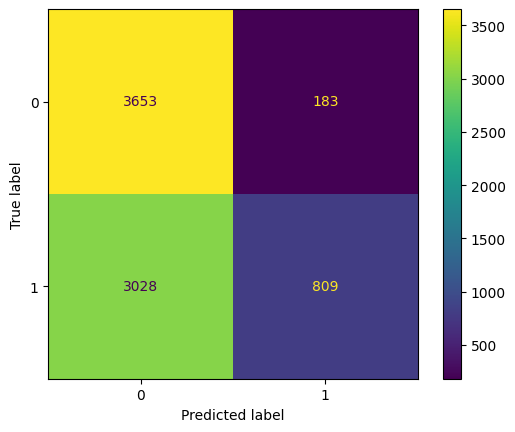

In [ ]:
d_tree = DecisionTreeClassifier(max_depth=7, min_samples_leaf=2)

bow_perf = train_and_evaluate(d_tree, x_train_bow, y_train_bow, x_val_bow, y_val_bow)
bow_perf

- the performance indicates that 55% of the sentences predicted to have been made by Aristotle were correct. However, 95% of the statements made by Aristotle in the dataset were correctly predicted to classified correctly.
- Also, 82% of the sentences predicted to have been made by Plato was correct. However only 21% of the the statements made by Plato in the dataset were rightly classifed.
- the f1 score for aristotle and plato classes were 0.69 and 0.34 respectively.
- the ROC-AUC score indicated that the model is only able to distinguish between statement from both authors 63.6% of the time.
- the model performs better at classifying Aristotle's comment than Plato's.

# Implementing Decision tree using the TF-IDF features

train accuracy : 0.580
              precision    recall  f1-score   support

           0       0.55      0.96      0.70      3836
           1       0.84      0.20      0.32      3837

    accuracy                           0.58      7673
   macro avg       0.69      0.58      0.51      7673
weighted avg       0.69      0.58      0.51      7673



,Accuracy,Recall,Precision,f1,AUC
0,0.580738,0.200156,0.838428,0.323164,0.635173


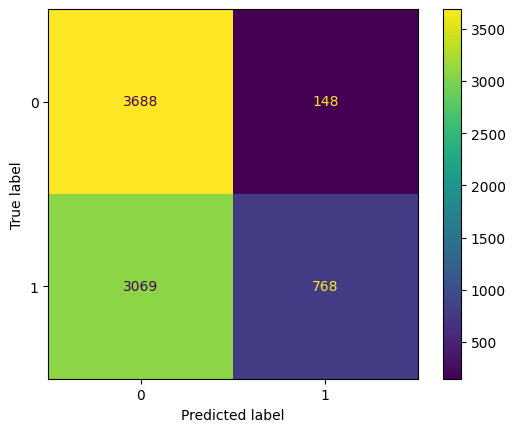

In [ ]:
d_tree = DecisionTreeClassifier(max_depth=7, min_samples_leaf=2)

bow_perf = train_and_evaluate(d_tree, x_train_tf, y_train_tf, x_val_tf, y_val_tf)
bow_perf

- the performance indicates that 55% of the sentences predicted to have been made by Aristotle were correct. However, 96% of the statements made by Aristotle in the dataset were correctly predicted to classified correctly.
- Also, 84% of the sentences predicted to have been made by Plato was correct. However only 20% of the the statements made by Plato in the dataset were rightly classifed.
- the f1 score for aristotle and plato classes were 0.70 and 0.32 respectively.
- the ROC-AUC score indicated that the model is only able to distinguish between statement from both authors 63.5% of the time.
- the model performs better at classifying Aristotle's comment than Plato's.

# Implementing Decision tree using the CBOW embeddings

train accuracy : 0.774
              precision    recall  f1-score   support

           0       0.80      0.72      0.75      3836
           1       0.74      0.82      0.78      3837

    accuracy                           0.77      7673
   macro avg       0.77      0.77      0.77      7673
weighted avg       0.77      0.77      0.77      7673



,Accuracy,Recall,Precision,f1,AUC
0,0.766714,0.81522,0.743169,0.777529,0.848834


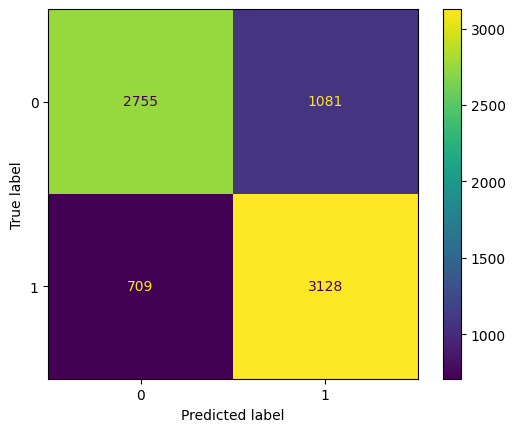

In [ ]:
d_tree = DecisionTreeClassifier(max_depth=7, min_samples_leaf=2)

bow_perf = train_and_evaluate(d_tree, x_train_cbow, y_train_cbow, x_val_cbow, y_val_cbow)
bow_perf

- the performance indicates that 80% of the sentences predicted to have been made by Aristotle were correct. However, 72% of the statements made by Aristotle in the dataset were correctly predicted to classified correctly.
- Also, 74% of the sentences predicted to have been made by Plato was correct. However only 82% of the the statements made by Plato in the dataset were rightly classifed.
- the f1 score for aristotle and plato classes were 0.75 and 0.78 respectively.
- the ROC-AUC score indicated that the model is only able to distinguish between statement from both authors 84.9% of the time.
- the model performs better when dense vectors are used.

# Implementing Decision tree using the skipgram embeddings

train accuracy : 0.794
              precision    recall  f1-score   support

           0       0.80      0.75      0.77      3836
           1       0.76      0.81      0.79      3837

    accuracy                           0.78      7673
   macro avg       0.78      0.78      0.78      7673
weighted avg       0.78      0.78      0.78      7673



,Accuracy,Recall,Precision,f1,AUC
0,0.781311,0.812875,0.764648,0.788024,0.862139


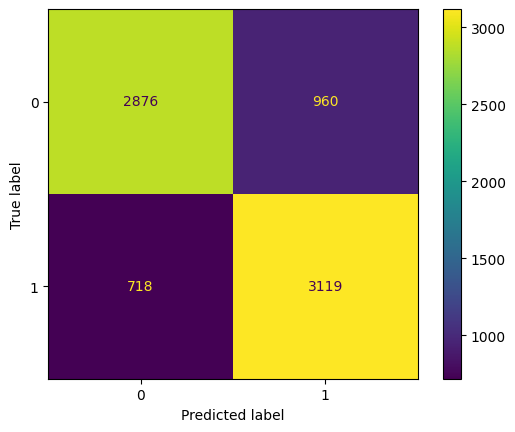

In [ ]:
d_tree = DecisionTreeClassifier(max_depth=7, min_samples_leaf=2)

sg_perf = train_and_evaluate(d_tree, x_train_sg, y_train_sg, x_val_sg, y_val_sg)
sg_perf

- the performance indicates that 80% of the sentences predicted to have been made by Aristotle were correct. However, 75% of the statements made by Aristotle in the dataset were correctly predicted to classified correctly.
- Also, 76% of the sentences predicted to have been made by Plato was correct. However only 81% of the the statements made by Plato in the dataset were rightly classifed.
- the f1 score for aristotle and plato classes were 0.77 and 0.79 respectively.
- the ROC-AUC score indicated that the model is only able to distinguish between statement from both authors 86.2% of the time.
- the model performs better when dense vectors are used.

# Implementing Decision tree using the GloVe embeddings

train accuracy : 0.713
              precision    recall  f1-score   support

           0       0.70      0.68      0.69      3836
           1       0.69      0.71      0.70      3837

    accuracy                           0.69      7673
   macro avg       0.69      0.69      0.69      7673
weighted avg       0.69      0.69      0.69      7673



,Accuracy,Recall,Precision,f1,AUC
0,0.694774,0.70993,0.689097,0.699358,0.764679


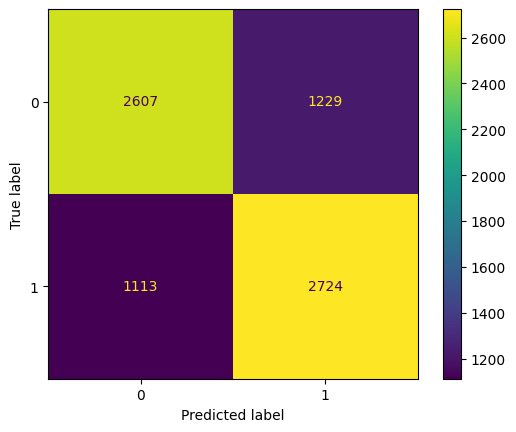

In [ ]:
d_tree = DecisionTreeClassifier(max_depth=7, min_samples_leaf=2)

glv_perf = train_and_evaluate(d_tree, x_train_glv, y_train_glv, x_val_glv, y_val_glv)
glv_perf

- the performance indicates that 70% of the sentences predicted to have been made by Aristotle were correct. However, 68% of the statements made by Aristotle in the dataset were correctly predicted to classified correctly.
- Also, 69% of the sentences predicted to have been made by Plato was correct. However only 71% of the the statements made by Plato in the dataset were rightly classifed.
- the f1 score for aristotle and plato classes were 0.68 and 0.68 respectively.
- the glove embeddings failed to perform as better as word2vec embeddings.

# Ensemble Methods

# Random Forest

# Implementing Random Forest using the Countvectorizer (BOW) features

train accuracy : 0.745
              precision    recall  f1-score   support

           0       0.83      0.64      0.72      3836
           1       0.71      0.87      0.78      3837

    accuracy                           0.75      7673
   macro avg       0.77      0.75      0.75      7673
weighted avg       0.77      0.75      0.75      7673



,Accuracy,Recall,Precision,f1,AUC
0,0.753551,0.868647,0.706144,0.779011,0.833679


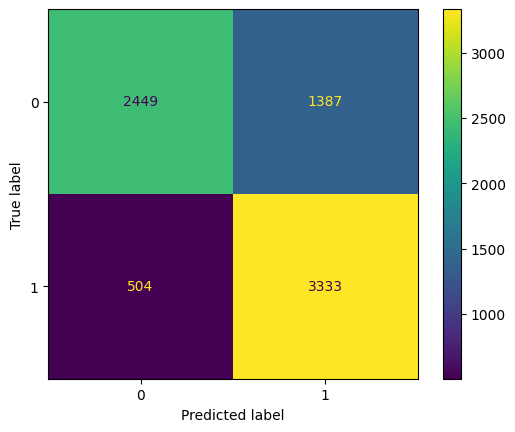

In [ ]:
rf = RandomForestClassifier(max_depth=7, n_estimators=100)

bow_perf = train_and_evaluate(rf, x_train_bow, y_train_bow, x_val_bow, y_val_bow)
bow_perf

- the performance indicates that 83% of the sentences predicted to have been made by Aristotle were correct. However, 64% of the statements made by Aristotle in the dataset were correctly predicted to classified correctly.
- Also, 71% of the sentences predicted to have been made by Plato was correct. However only 87% of the the statements made by Plato in the dataset were rightly classifed.
- the f1 score for aristotle and plato classes were 0.72 and 0.78 respectively.
- the ROC-AUC score indicated that the model is only able to distinguish between statement from both authors 83.4% of the time.
- the ensemble random forest method performs better than decison tree model using bow features.

# Implementing RandomForestClassifier using the TF-IDF features

train accuracy : 0.751
              precision    recall  f1-score   support

           0       0.82      0.65      0.73      3836
           1       0.71      0.86      0.78      3837

    accuracy                           0.76      7673
   macro avg       0.77      0.76      0.75      7673
weighted avg       0.77      0.76      0.75      7673



,Accuracy,Recall,Precision,f1,AUC
0,0.756158,0.861089,0.711762,0.779337,0.833717


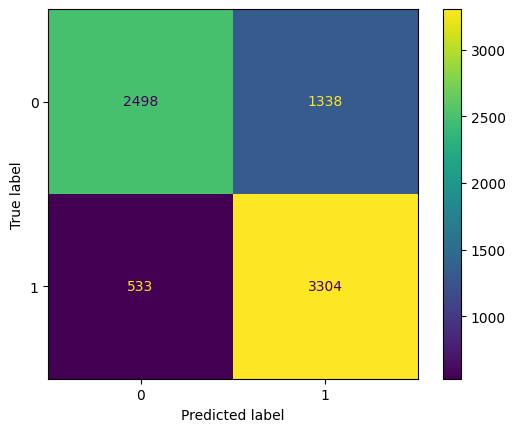

In [ ]:
rf = RandomForestClassifier(max_depth=7, n_estimators=100)

tf_perf = train_and_evaluate(rf, x_train_tf, y_train_tf, x_val_tf, y_val_tf)
tf_perf

- the performance indicates that 82% of the sentences predicted to have been made by Aristotle were correct. However, 65% of the statements made by Aristotle in the dataset were correctly predicted to classified correctly.
- Also, 71% of the sentences predicted to have been made by Plato was correct. However only 86% of the the statements made by Plato in the dataset were rightly classifed.
- the ROC-AUC score indicated that the model is only able to distinguish between statement from both authors 83.4% of the time.
- the f1 score for aristotle and plato classes were 0.73 and 0.78 respectively.


# Implementing RandomForest classifier using the CBOW embeddings

train accuracy : 0.789
              precision    recall  f1-score   support

           0       0.80      0.76      0.78      3836
           1       0.77      0.81      0.79      3837

    accuracy                           0.79      7673
   macro avg       0.79      0.79      0.78      7673
weighted avg       0.79      0.79      0.78      7673



,Accuracy,Recall,Precision,f1,AUC
0,0.785091,0.814178,0.769458,0.791187,0.868817


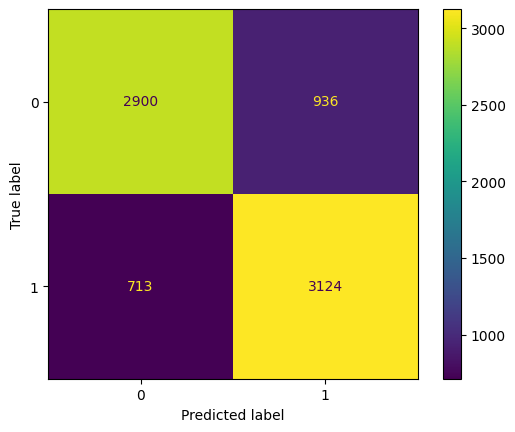

In [ ]:
rf = RandomForestClassifier(max_depth=7, n_estimators=100)

cbow_perf = train_and_evaluate(rf, x_train_cbow, y_train_cbow, x_val_cbow, y_val_cbow)
cbow_perf

- the performance indicates that 80% of the sentences predicted to have been made by Aristotle were correct. However, 76% of the statements made by Aristotle in the dataset were correctly predicted to classified correctly.
- Also, 77% of the sentences predicted to have been made by Plato was correct. However only 81% of the the statements made by Plato in the dataset were rightly classifed.
- the f1 score for aristotle and plato classes were 0.78 and 0.79 respectively.
- the ROC-AUC score indicated that the model is only able to distinguish between statement from both authors 86.9% of the time.
- so far, this is the best performing model based on f1_score for both classes.

# Implementing RandomForestClassifier using the skipgram embeddings

train accuracy : 0.810
              precision    recall  f1-score   support

           0       0.81      0.79      0.80      3836
           1       0.80      0.81      0.80      3837

    accuracy                           0.80      7673
   macro avg       0.80      0.80      0.80      7673
weighted avg       0.80      0.80      0.80      7673



,Accuracy,Recall,Precision,f1,AUC
0,0.802815,0.813396,0.79658,0.8049,0.889493


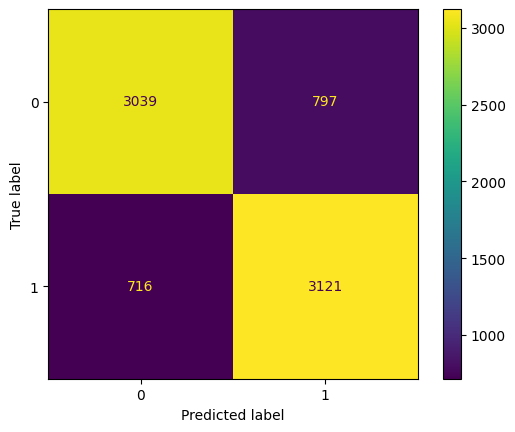

In [ ]:
rf = RandomForestClassifier(max_depth=7, n_estimators=100)

sg_perf = train_and_evaluate(rf, x_train_sg, y_train_sg, x_val_sg, y_val_sg)
sg_perf

- the performance indicates that 81% of the sentences predicted to have been made by Aristotle were correct. However, 79% of the statements made by Aristotle in the dataset were correctly predicted to classified correctly.
- Also, 80% of the sentences predicted to have been made by Plato was correct. However only 81% of the the statements made by Plato in the dataset were rightly classifed.
- the f1 score for aristotle and plato classes were 0.80 and 0.80 respectively.
- the ROC-AUC score indicated that the model is only able to distinguish between statement from both authors 88.9% of the time.
- this is the best performing model so far

# Implementing RandomForestClassifier using the GloVe embeddings

train accuracy : 0.754
              precision    recall  f1-score   support

           0       0.72      0.76      0.74      3836
           1       0.75      0.71      0.73      3837

    accuracy                           0.73      7673
   macro avg       0.73      0.73      0.73      7673
weighted avg       0.73      0.73      0.73      7673



,Accuracy,Recall,Precision,f1,AUC
0,0.733872,0.706802,0.747313,0.726493,0.814304


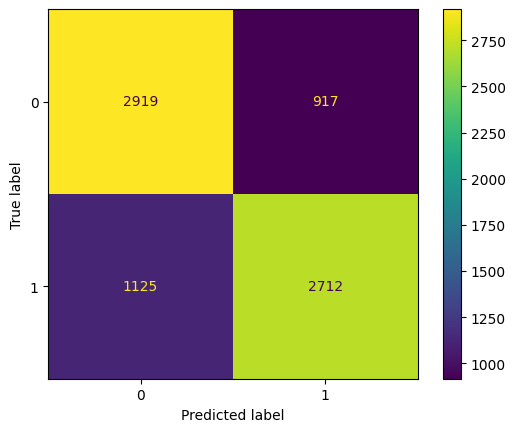

In [ ]:
rf = RandomForestClassifier(max_depth=7, n_estimators=100)

glv_perf = train_and_evaluate(rf, x_train_glv, y_train_glv, x_val_glv, y_val_glv)
glv_perf

- the performance indicates that 72% of the sentences predicted to have been made by Aristotle were correct. However, 76% of the statements made by Aristotle in the dataset were correctly predicted to classified correctly.
- Also, 75% of the sentences predicted to have been made by Plato was correct. However only 71% of the the statements made by Plato in the dataset were rightly classifed.
- the f1 score for aristotle and plato classes were 0.74 and 0.73 respectively.
- the ROC-AUC score indicated that the model is only able to distinguish between statement from both authors 81.4% of the time.
- the glove embeddings still failed to perform as better as word2vec embeddings using the random forest algorithm

# GradientBoosting Classifier

# Implementing GradientBoosting Classifierusing the Countvectorizer (BOW) features

train accuracy : 0.769
              precision    recall  f1-score   support

           0       0.84      0.66      0.74      3836
           1       0.72      0.87      0.79      3837

    accuracy                           0.77      7673
   macro avg       0.78      0.77      0.77      7673
weighted avg       0.78      0.77      0.77      7673



,Accuracy,Recall,Precision,f1,AUC
0,0.768278,0.872557,0.722019,0.790182,0.847396


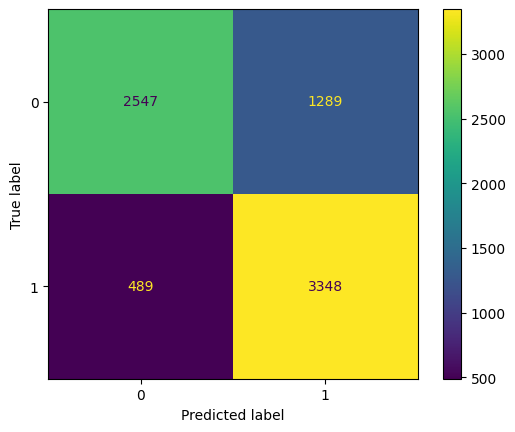

In [ ]:
grb = GradientBoostingClassifier(n_estimators=100, max_depth=4)

bow_perf = train_and_evaluate(grb, x_train_bow, y_train_bow, x_val_bow, y_val_bow)
bow_perf

- the performance indicates that 84% of the sentences predicted to have been made by Aristotle were correct. However, 66% of the statements made by Aristotle in the dataset were correctly predicted to classified correctly.
- Also, 72% of the sentences predicted to have been made by Plato was correct. However only 87% of the the statements made by Plato in the dataset were rightly classifed.
- the f1 score for aristotle and plato classes were 0.74 and 0.79 respectively.
- the ROC-AUC score indicated that the model is only able to distinguish between statement from both authors 84.7% of the time.
- the ensemble random forest method performs better than decison tree model using bow features.

# Implementing GradientBoostingClassifier using the TF-IDF features

train accuracy : 0.774
              precision    recall  f1-score   support

           0       0.83      0.68      0.75      3836
           1       0.73      0.86      0.79      3837

    accuracy                           0.77      7673
   macro avg       0.78      0.77      0.77      7673
weighted avg       0.78      0.77      0.77      7673



,Accuracy,Recall,Precision,f1,AUC
0,0.773491,0.864999,0.731218,0.792502,0.852751


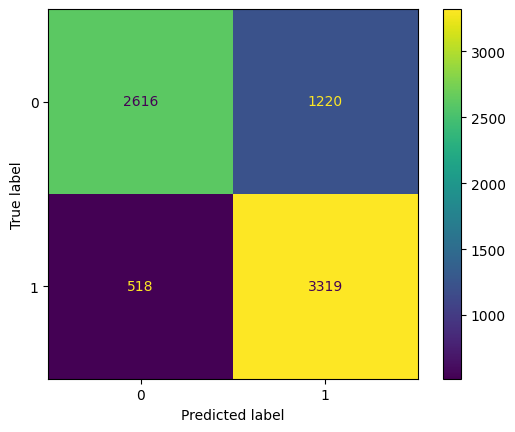

In [ ]:
grb = GradientBoostingClassifier(n_estimators=100, max_depth=4)

tf_perf = train_and_evaluate(grb, x_train_tf, y_train_tf, x_val_tf, y_val_tf)
tf_perf

- the performance indicates that 83% of the sentences predicted to have been made by Aristotle were correct. However, 68% of the statements made by Aristotle in the dataset were correctly predicted to classified correctly.
- Also, 73% of the sentences predicted to have been made by Plato was correct. However only 86% of the the statements made by Plato in the dataset were rightly classifed.
- the ROC-AUC score indicated that the model is only able to distinguish between statement from both authors 85.3% of the time.
- the f1 score for aristotle and plato classes were 0.75 and 0.79 respectively.


# Implementing GradientBoostingClassifier using the CBOW embeddings

train accuracy : 0.808
              precision    recall  f1-score   support

           0       0.81      0.78      0.79      3836
           1       0.79      0.82      0.80      3837

    accuracy                           0.80      7673
   macro avg       0.80      0.80      0.80      7673
weighted avg       0.80      0.80      0.80      7673



,Accuracy,Recall,Precision,f1,AUC
0,0.797602,0.81913,0.785357,0.801888,0.884493


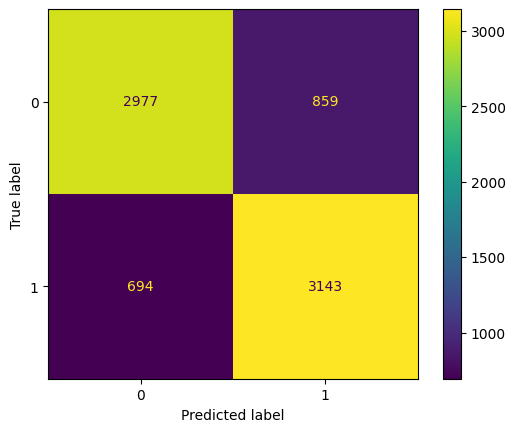

In [ ]:
grb = GradientBoostingClassifier(n_estimators=100, max_depth=4)

cbow_perf = train_and_evaluate(grb, x_train_cbow, y_train_cbow, x_val_cbow, y_val_cbow)
cbow_perf

- the performance indicates that 81% of the sentences predicted to have been made by Aristotle were correct. However, 78% of the statements made by Aristotle in the dataset were correctly predicted to classified correctly.
- Also, 79% of the sentences predicted to have been made by Plato was correct. However only 82% of the the statements made by Plato in the dataset were rightly classifed.
- the f1 score for aristotle and plato classes were 0.79 and 0.80 respectively.
- the ROC-AUC score indicated that the model is only able to distinguish between statement from both authors 88.4% of the time.


# Implementing GradientBoostingClassifier using the skipgram embeddings

train accuracy : 0.833
              precision    recall  f1-score   support

           0       0.83      0.81      0.82      3836
           1       0.81      0.84      0.82      3837

    accuracy                           0.82      7673
   macro avg       0.82      0.82      0.82      7673
weighted avg       0.82      0.82      0.82      7673



,Accuracy,Recall,Precision,f1,AUC
0,0.822494,0.835809,0.814166,0.824846,0.907217


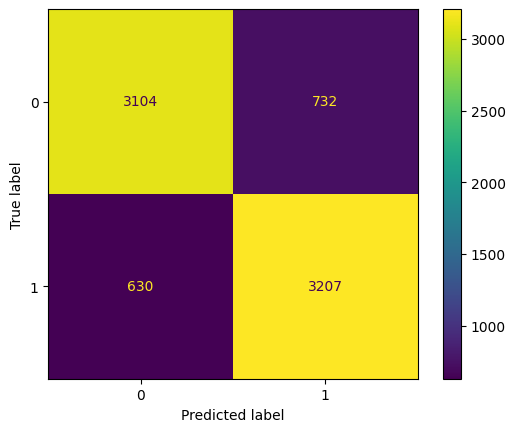

In [ ]:
grb = GradientBoostingClassifier(n_estimators=100, max_depth=4)

sg_perf = train_and_evaluate(grb, x_train_sg, y_train_sg, x_val_sg, y_val_sg)
sg_perf

- the performance indicates that 83% of the sentences predicted to have been made by Aristotle were correct. However, 81% of the statements made by Aristotle in the dataset were correctly predicted to classified correctly.
- Also, 81% of the sentences predicted to have been made by Plato was correct. However only 84% of the the statements made by Plato in the dataset were rightly classifed.
- the f1 score for aristotle and plato classes were 0.82 and 0.82 respectively.
- the ROC-AUC score indicated that the model is only able to distinguish between statement from both authors 90.7% of the time.
- this is the best performing model so far

# Implementing GradientBoostingClassifier using the GloVe embeddings

train accuracy : 0.780
              precision    recall  f1-score   support

           0       0.77      0.78      0.77      3836
           1       0.77      0.76      0.77      3837

    accuracy                           0.77      7673
   macro avg       0.77      0.77      0.77      7673
weighted avg       0.77      0.77      0.77      7673



,Accuracy,Recall,Precision,f1,AUC
0,0.770103,0.763878,0.773555,0.768686,0.84534


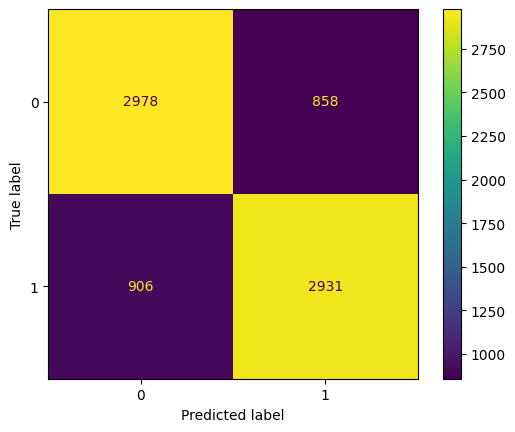

In [ ]:
grb = GradientBoostingClassifier(n_estimators=100, max_depth=4)

glv_perf = train_and_evaluate(grb, x_train_glv, y_train_glv, x_val_glv, y_val_glv)
glv_perf

- the performance indicates that 77% of the sentences predicted to have been made by Aristotle were correct. However, 78% of the statements made by Aristotle in the dataset were correctly predicted to classified correctly.
- Also, 77% of the sentences predicted to have been made by Plato was correct. However only 76% of the the statements made by Plato in the dataset were rightly classifed.
- the f1 score for aristotle and plato classes were 0.77 and 0.77 respectively.
- the ROC-AUC score indicated that the model is only able to distinguish between statement from both authors 84.5% of the time.

# Stacking
- Since improved performance is seen when word embeddings are used, the stacking model will be trained and evaluated using CBOW and SkipGram vectors.
# Implementing Stacking model using skipgram vectors

In [ ]:
from sklearn.ensemble import StackingClassifier, AdaBoostClassifier

#the stacking classifier will make use of RandomForestclassifier and GradientBoosting classifier.
estimators = [('rf', RandomForestClassifier(n_estimators=100, max_depth=7, random_state=42)),
 ('grb', GradientBoostingClassifier(n_estimators=100, max_depth=4, random_state=42))]

#the final estimator will be an AdaBoostClassifier
final_estimator = AdaBoostClassifier(random_state=42)

clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator, n_jobs=-1)

In [ ]:
clf

StackingClassifier(estimators=[('rf',
                                RandomForestClassifier(max_depth=7,
                                                       random_state=42)),
                               ('grb',
                                GradientBoostingClassifier(max_depth=4,
                                                           random_state=42))],
                   final_estimator=AdaBoostClassifier(random_state=42),
                   n_jobs=-1)

train accuracy : 0.833
              precision    recall  f1-score   support

           0       0.83      0.81      0.82      3836
           1       0.81      0.84      0.83      3837

    accuracy                           0.82      7673
   macro avg       0.82      0.82      0.82      7673
weighted avg       0.82      0.82      0.82      7673



,Accuracy,Recall,Precision,f1,AUC
0,0.823146,0.837894,0.813924,0.825735,0.905052


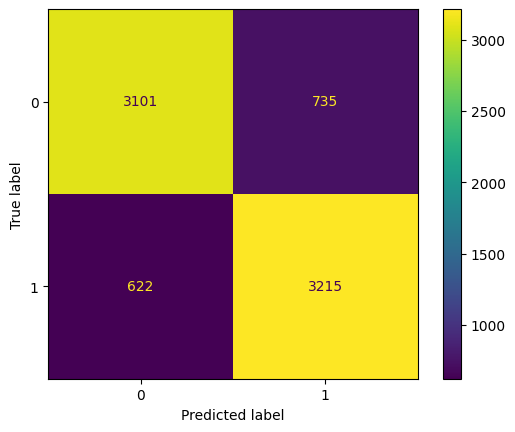

In [ ]:
#train and evaluate the performance
sg_perf = train_and_evaluate(clf, x_train_sg, y_train_sg, x_val_sg, y_val_sg)
sg_perf

- the performance indicates that 83% of the sentences predicted to have been made by Aristotle were correct. However, 81% of the statements made by Aristotle in the dataset were correctly predicted to classified correctly.
- Also, 81% of the sentences predicted to have been made by Plato was correct. However only 84% of the the statements made by Plato in the dataset were rightly classifed.
- the f1 score for aristotle and plato classes were 0.82 and 0.83 respectively.
- the ROC-AUC score indicated that the model is only able to distinguish between statement from both authors 90.5% of the time.

# Implementing Stacking model using CBOW vectors

In [ ]:
from sklearn.ensemble import StackingClassifier, AdaBoostClassifier

#the stacking classifier will make use of RandomForestclassifier and GradientBoosting classifier.
estimators = [('rf', RandomForestClassifier(n_estimators=100, max_depth=7, random_state=42)),
 ('grb', GradientBoostingClassifier(n_estimators=100, max_depth=4, random_state=42))]

#the final estimator will be an AdaBoostClassifier
final_estimator = AdaBoostClassifier(random_state=42)

clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator, n_jobs=-1)
clf

StackingClassifier(estimators=[('rf',
                                RandomForestClassifier(max_depth=7,
                                                       random_state=42)),
                               ('grb',
                                GradientBoostingClassifier(max_depth=4,
                                                           random_state=42))],
                   final_estimator=AdaBoostClassifier(random_state=42),
                   n_jobs=-1)

train accuracy : 0.805
              precision    recall  f1-score   support

           0       0.82      0.76      0.79      3836
           1       0.78      0.83      0.80      3837

    accuracy                           0.80      7673
   macro avg       0.80      0.80      0.80      7673
weighted avg       0.80      0.80      0.80      7673



,Accuracy,Recall,Precision,f1,AUC
0,0.796299,0.8319,0.776642,0.803322,0.879739


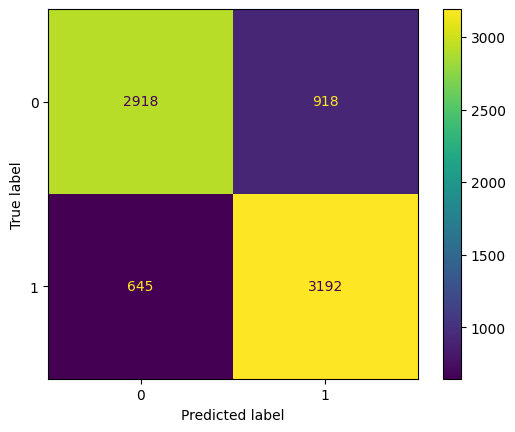

In [ ]:
cbow_perf = train_and_evaluate(clf, x_train_cbow, y_train_cbow, x_val_cbow, y_val_cbow)
cbow_perf

- the performance indicates that 82% of the sentences predicted to have been made by Aristotle were correct. However, 76% of the statements made by Aristotle in the dataset were correctly predicted to classified correctly.
- Also, 78% of the sentences predicted to have been made by Plato was correct. However only 83% of the the statements made by Plato in the dataset were rightly classifed.
- the f1 score for aristotle and plato classes were 0.79 and 0.80 respectively.
- the ROC-AUC score indicated that the model is only able to distinguish between statement from both authors 88% of the time.

# Implementing Naive Bayes Model
- the gaussian NB model will be used with the cbow and skipgram word embeddings.


In [ ]:
#import relevant packages
from sklearn.naive_bayes import GaussianNB, CategoricalNB


# Implementing Gaussian NB on CBOW word embeddings

train accuracy : 0.740
              precision    recall  f1-score   support

           0       0.78      0.68      0.73      3836
           1       0.72      0.81      0.76      3837

    accuracy                           0.75      7673
   macro avg       0.75      0.75      0.75      7673
weighted avg       0.75      0.75      0.75      7673



,Accuracy,Recall,Precision,f1,AUC
0,0.746383,0.813657,0.717207,0.762393,0.819336


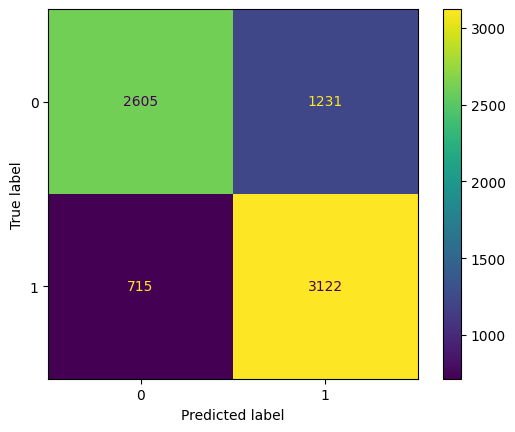

In [ ]:
gaussnb = GaussianNB()

cbow_perf = train_and_evaluate(gaussnb, x_train_cbow, y_train_cbow, x_val_cbow, y_val_cbow)
cbow_perf

- the performance indicates that 78% of the sentences predicted to have been made by Aristotle were correct. However, 68% of the statements made by Aristotle in the dataset were correctly predicted to classified correctly.
- Also, 72% of the sentences predicted to have been made by Plato was correct. However only 81% of the the statements made by Plato in the dataset were rightly classifed.
- the f1 score for aristotle and plato classes were 0.73 and 0.76 respectively.
- the ROC-AUC score indicated that the model is only able to distinguish between statement from both authors 81.8% of the time.

# Implementing GaussainNB model using SkipGram word embeddings

train accuracy : 0.800
              precision    recall  f1-score   support

           0       0.86      0.73      0.79      3836
           1       0.76      0.88      0.82      3837

    accuracy                           0.80      7673
   macro avg       0.81      0.80      0.80      7673
weighted avg       0.81      0.80      0.80      7673



,Accuracy,Recall,Precision,f1,AUC
0,0.804118,0.878551,0.764746,0.817708,0.834347


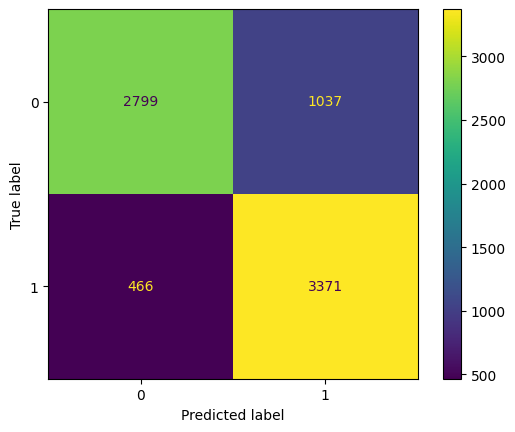

In [ ]:
gaussnb = GaussianNB()
tf_perf = train_and_evaluate(gaussnb, x_train_tf, y_train_tf, x_val_tf, y_val_tf)
tf_perf

- the performance indicates that 86% of the sentences predicted to have been made by Aristotle were correct. However, 73% of the statements made by Aristotle in the dataset were correctly predicted to classified correctly.
- Also, 76% of the sentences predicted to have been made by Plato was correct. However only 88% of the the statements made by Plato in the dataset were rightly classifed.
- the f1 score for aristotle and plato classes were 0.79 and 0.82 respectively.
- the ROC-AUC score indicated that the model is only able to distinguish between statement from both authors 83.4% of the time.

# Implementing Recurrent Neural Network

#### this will be implemented with the following steps:
- step1: import relevant package
- step2: tokenize the comments
- step3: pad the sequence of integers
- step4: split the dataset
- step5: build a recall score calculator or callable class
- step6: define callbacks
- step7: build the model
- step8: train and evaluate the model

## step2: Tokenize the comments


In [ ]:
#initialize the tokenizer
tokenizer = Tokenizer(num_words=1000)

#fit on data to update vocabulary
tokenizer.fit_on_texts(df['sentence'].values)

#convert text to sequence of integers
X_tokens = tokenizer.texts_to_sequences(df['sentence'].values)



## step3: pad the sequence
- to reduce the problem of sparisity, instead of using maximum length of comment as the max length, i will obtain the descriptive stats of the length of all the comments as this will help me know the best padding length to use.

In [ ]:

length = []
#for each row in the data
for i in range(len(df['sentence'].values)):
  #append the length of each string to the list
  length.append(len(df['sentence'][i].split()))

#convert the list to a series
length_df = pd.Series(length)
#give a descriptive stats of it
print(length_df.describe())

count    76732.000000
mean        10.603633
std          7.239725
min          0.000000
25%          5.000000
50%          9.000000
75%         14.000000
max        103.000000
dtype: float64


- this shows that 75% of the cleaned texts contains no more than 14 words.
- the longest sentence contains 103 words.
#### I will set maxlen to 50 during padding so that the longest padding length will be at 50.

In [ ]:
#to ensure consistency in length
X = pad_sequences(X_tokens, maxlen=50)

## step4: split the dataset into train, validation and test

In [ ]:
#split the bow vectors into train, validation and test set
x_train_rnn, x_val_rnn, x_test_rnn, y_train_rnn, y_val_rnn, y_test_rnn = split_data(df, X, target='author')

In [ ]:
#define metrics
Metric = [

       tf.keras.metrics.BinaryAccuracy(name='accuracy'),
       tf.keras.metrics.Precision(name='precision'),
       tf.keras.metrics.Recall(name='recall'),
       tf.keras.metrics.AUC(name='auc'),
]

## step5: build a recall score calculator or callable class

In [ ]:
#build a recall score callable metrics
from sklearn.metrics import classification_report
class ClassificationReporter(tf.keras.callbacks.Callback):
    #use the class constuctor to initialize the attributes

    def __init__(self, x, y):
        """
        self: object or instance of the class
        x: features
        y: target
        """
        #callback should be a child class of Recall_Calculate and retains the attributes
        super(ClassificationReporter, self).__init__()
        self.x = x
        self.y = y


    def on_epoch_end(self, epoch, logs=None):
        """
        computes the accuracy, recall, ROC-AUC, f1 scores and show a classification report

        """
        x = self.x
        y = self.y

        y_pred = self.model.predict(x)
        y_pred_class = tf.argmax(y_pred, axis=1).numpy()
        pred_proba = self.model.predict(x)[:,1]   #predict the probability and subset all the rows of second column

        #calculate accuracy
        acc = accuracy_score(y, y_pred_class)

        #calcilate recall
        recall = recall_score(y, y_pred_class)

        #auc score
        auc_score = roc_auc_score(y, pred_proba)

        #calculate precision
        precision = precision_score(y, y_pred_class)


        #f1 score
        f1 = f1_score(y, y_pred_class)

        #put values in a dataframe
        df = pd.DataFrame({"Accuracy" : acc,
                          "Recall" : recall,
                          "Precision" : precision,
                          "f1" : f1,
                          "AUC" : auc_score}, index = [0])

        # Compute the classification report
        report = classification_report(y, y_pred_class)
        print(report)
        return df




## step6: define callbacks

In [ ]:
# define early stopping layer
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
es = EarlyStopping(monitor='val_auc', mode='max', verbose=2, patience=3)

#define modelcheckpoint to save best model
rnn_path = '/content/drive/MyDrive/authorship_attribution_project/rnn_model_checkpoint.model'
mc = ModelCheckpoint(filepath = path, save_best_only=True, monitor='val_auc', mode='max')

#initialize the recall metrics
report = ClassificationReporter(x_val_rnn, y_val_rnn)

## step7: build the model

In [ ]:
#clear backend
from tensorflow.keras import backend
backend.clear_session()

In [ ]:
from tensorflow.keras.layers import SpatialDropout1D

In [ ]:
def RNN_model(embedding_dims=100,output_sequence_length=100, hidden_dims=64):
    model = Sequential() # to arrange the layers in a sequential order


    model.add(Embedding(1000, output_dim=embedding_dims,input_length=X.shape[1])) # add an embedding layer that will learn the word embedding by itself

    model.add(SpatialDropout1D(0.7)) #add spatial dropout to reduce overfiting

    model.add(SimpleRNN(units=hidden_dims))#add a simplernn layer

    model.add(Dense(100, activation='relu')) #add a dense layer
    model.add(Dropout(0.5))# add a dropout layer to reduce overfiting
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(2, activation ='sigmoid')) #add a layer for classification



    model.compile(optimizer='adam', metrics=Metric, loss='categorical_crossentropy') #complile the model

    return model

In [ ]:
rnn1 = RNN_model()

rnn1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 100)           100000    
                                                                 
 spatial_dropout1d (SpatialD  (None, 50, 100)          0         
 ropout1D)                                                       
                                                                 
 simple_rnn (SimpleRNN)      (None, 64)                10560     
                                                                 
 dense (Dense)               (None, 100)               6500      
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                6464      
                                                        

In [ ]:
y_train_c = to_categorical(y_train_rnn)
y_val_c = to_categorical(y_val_rnn)
y_test_c = to_categorical(y_test_rnn)


## step8: train and evaluate the model

In [ ]:
rnn1_history = rnn1.fit(x_train_rnn, y_train_c, batch_size=64,
        validation_data= (x_val_rnn, y_val_c), epochs=7, callbacks=[es, report, mc])

Epoch 1/7
240/240 [==============================] - 2s 8ms/step
              precision    recall  f1-score   support

           0       0.86      0.79      0.82      3836
           1       0.81      0.87      0.84      3837

    accuracy                           0.83      7673
   macro avg       0.83      0.83      0.83      7673
weighted avg       0.83      0.83      0.83      7673

960/960 [==============================] - 37s 36ms/step - loss: 0.5060 - accuracy: 0.7382 - precision: 0.7058 - recall: 0.8170 - auc: 0.8301 - val_loss: 0.3935 - val_accuracy: 0.8302 - val_precision: 0.8231 - val_recall: 0.8411 - val_auc: 0.9076
Epoch 2/7
240/240 [==============================] - 1s 5ms/step
              precision    recall  f1-score   support

           0       0.83      0.84      0.84      3836
           1       0.84      0.83      0.84      3837

    accuracy                           0.84      7673
   macro avg       0.84      0.84      0.84      7673
weighted avg       0.84 

# Visualize the RNN performance

In [ ]:
def view_perf(history):
  """
  plots the accuracy, val_accuracy  against epochs
  """
  #define accuracy
  acc = history.history['accuracy']

  #define validation_accuracy
  val_acc = history.history['val_accuracy']

  #specify epochs
  epochs = range(1, len(acc) + 1)

  plt.figure(figsize= (5,5)) #set figure size
  plt.plot(epochs, acc, label="Train Accuracy") #plot accuracy against epochs
  plt.plot(epochs, val_acc, label="validation accuracy") #plot val_acc against epcohs
  #plt.plot(epochs, recall_vals, label="recall values")#plot recall values against epochs

  plt.xlabel("Epochs") #label the x-axis
  plt.ylabel("Accuracy score") #label the y-axis

  plt.legend(loc='best') #display the legends at the best location in the chart

  plt.show()#show the plot

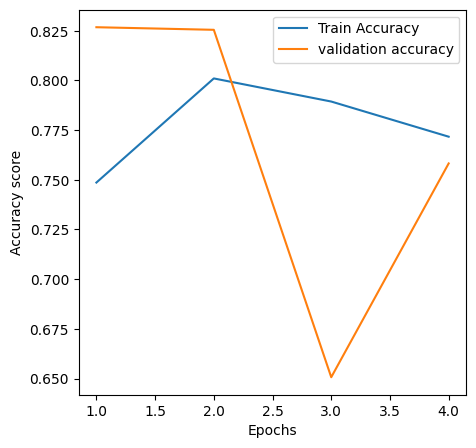

In [ ]:
view_perf(rnn1_history)

- the model began to overfit from the third epoch.

In [ ]:
average_val_accuracy = np.mean(rnn1_history.history['val_accuracy'])
average_auc = np.mean(rnn1_history.history['auc'])
average_val_auc = np.mean(rnn1_history.history['val_auc'])


df = pd.DataFrame(data=[(average_val_accuracy, average_auc, average_val_auc)], columns=['Val_accuracy', 'average_AUC', 'average_val_AUC'],
                  index=[0])
df

,Val_accuracy,average_AUC,average_val_AUC
0,0.789118,0.874273,0.896219


# Evaluate the model on test set

In [ ]:
#evaluate performance on test set
_,_,_,_,test_auc = rnn1.evaluate(x_test_rnn, y_test_c)
print(f"the test accuracy is {test_auc}")

240/240 [==============================] - 2s 9ms/step - loss: 0.3987 - accuracy: 0.7735 - precision: 0.7247 - recall: 0.8822 - auc: 0.8872
the test accuracy is 0.887161374092102


- this suggests that the model is relatively generalizes well

#  Implementing GRU (Gated Recurrent Unit)

## Clear Backend

In [ ]:
#clear backend
from tensorflow.keras import backend
backend.clear_session()

## define callbacks

In [ ]:
# define early stopping layer
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
es = EarlyStopping(monitor='val_auc', mode='max', verbose=2, patience=3, )

#define modelcheckpoint to save best model
gru_path = '/content/drive/MyDrive/authorship_attribution_project/gru_model_checkpoint.model'
mc = ModelCheckpoint(filepath = path, save_best_only=True, monitor='val_accuracy', mode='max')

#initialize the recall metrics
report = ClassificationReporter(x_val_rnn, y_val_rnn)

In [ ]:
from tensorflow.keras.layers import GRU


## design GRU Architecture

In [ ]:
def GRU_model(embedding_dims=100,output_sequence_length=100, hidden_dims=64):
    model = Sequential() # to arrange the layers in a sequential order


    model.add(Embedding(1000, output_dim=embedding_dims,input_length=X.shape[1])) # add an embedding layer that will learn the word embedding by itself

    model.add(SpatialDropout1D(0.7)) #add spatial dropout to reduce overfiting

    model.add(GRU(units=hidden_dims, recurrent_dropout=0.3))#add a simplernn layer

    model.add(Dense(100, activation='relu')) #add a dense layer
    model.add(Dropout(0.5))# add a dropout layer to reduce overfiting
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(2, activation ='sigmoid')) #add a layer for classification



    model.compile(optimizer='adam', metrics=Metric, loss='categorical_crossentropy') #complile the model

    return model

In [ ]:
gru1 = GRU_model()
gru1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 100)           100000    
                                                                 
 spatial_dropout1d (SpatialD  (None, 50, 100)          0         
 ropout1D)                                                       
                                                                 
 gru (GRU)                   (None, 64)                31872     
                                                                 
 dense (Dense)               (None, 100)               6500      
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                6464      
                                                        

In [ ]:
gru_history = gru1.fit(x_train_rnn, y_train_c, batch_size=64,
        validation_data= (x_val_rnn, y_val_c), epochs=7, callbacks=[es,report, mc])

Epoch 1/7
240/240 [==============================] - 3s 12ms/step
              precision    recall  f1-score   support

           0       0.87      0.80      0.83      3836
           1       0.82      0.88      0.85      3837

    accuracy                           0.84      7673
   macro avg       0.84      0.84      0.84      7673
weighted avg       0.84      0.84      0.84      7673

960/960 [==============================] - 121s 126ms/step - loss: 0.3866 - accuracy: 0.7753 - precision: 0.8357 - recall: 0.6854 - auc: 0.8726 - val_loss: 0.3573 - val_accuracy: 0.8390 - val_precision: 0.8450 - val_recall: 0.8303 - val_auc: 0.9024
Epoch 2/7
240/240 [==============================] - 3s 12ms/step
              precision    recall  f1-score   support

           0       0.86      0.82      0.84      3836
           1       0.83      0.86      0.84      3837

    accuracy                           0.84      7673
   macro avg       0.84      0.84      0.84      7673
weighted avg       0

# view GRU Performance

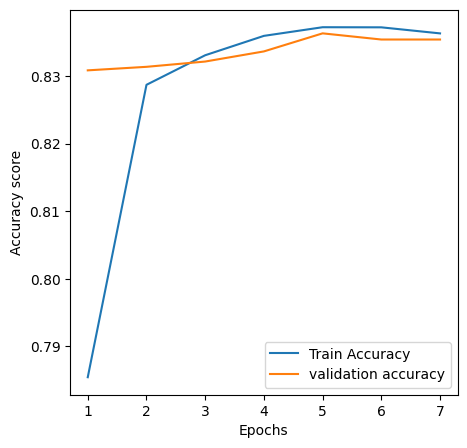

In [ ]:
view_perf(gru_history)

- the model overfit on the data at the second epoch only

In [ ]:
average_val_accuracy = np.mean(gru_history.history['val_accuracy'])
average_auc = np.mean(gru_history.history['auc'])
average_val_auc = np.mean(gru_history.history['val_auc'])


df = pd.DataFrame(data=[(average_val_accuracy, average_auc, average_val_auc)], columns=['Val_accuracy', 'average_AUC', 'average_val_AUC'],
                  index=[0])
df

,Val_accuracy,average_AUC,average_val_AUC
0,0.813828,0.879138,0.893163


# Evaluate the model on test set

In [ ]:
#evaluate performance on test set
_,test_accuracy,_,_,test_auc = gru1.evaluate(x_test_rnn, y_test_c)
print(f"the test accuracy and auc scores are {test_accuracy:.3f} and {test_auc:.3f} respectively")

240/240 [==============================] - 3s 12ms/step - loss: 0.3725 - accuracy: 0.8279 - precision: 0.8349 - recall: 0.8176 - auc: 0.8949
the test accuracy and auc scores are 0.828 and 0.895 respectively


- this suggests that the model is relatively generalizes well

# Implementing BERT

# Import relevant libraries


In [ ]:
!pip install transformers


import torch #pytorch module
import torch.nn as nn #import neural network
import transformers #import
from transformers import AutoModel, BertForTokenClassification, BertTokenizerFast #for tokenization and model creation
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler #to load the data in batches
from transformers import AdamW #optimizer
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from transformers import BertTokenizer, BertForSequenceClassification
import torch.nn.functional as F
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 21.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 39.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 47.2 MB/s eta 0:00:00


In [ ]:
df.head()

,author,sentence
0,0,men become ill accustomed live intemperately adopt temperate mode life
1,0,said ligurians sling skilfully see several bird contend one another bird preparing strike presuming easily hit mark
2,0,grieving enjoying alike flute played
3,0,subject developed indefinitely along line
4,0,people supreme stronger one man one majority stronger many ought rule many


In [ ]:
df.shape

(76732, 2)

In [ ]:
def bert_split_data(df, feature, target, train_size, test_size):
  #define feature and target
  X = feature
  y = df[target]

  ##split into train set, validation set and test set
  x_train, x_V, y_train, y_V = train_test_split(X, y, train_size=train_size, test_size=test_size, random_state=10, stratify=y)
  x_val, x_test, y_val, y_test = train_test_split(x_V, y_V, train_size=train_size, test_size=test_size, random_state=10, stratify=y_V)

  return x_train, x_val, x_test, y_train, y_val, y_test

# split the data

In [ ]:
x_train, x_val, x_test, y_train, y_val, y_test = bert_split_data(df,df['sentence'],'author', train_size=0.5, test_size =0.2)


In [ ]:
# Preprocess the data and create DataLoader
def preprocesser(feat, target, tokenizer):
    """
    returns a tensor dataset of dataset that is pushed to GPu for improved processing.
    feat: features in the data
    target : target
    tokenizer: initalized tokenizer
    """
    inputs = tokenizer(feat.tolist(), padding=True, truncation=True, return_tensors="pt")
    ids = torch.tensor(inputs['input_ids']).to(device)
    mask = torch.tensor(inputs['attention_mask']).to(device)
    labels = torch.tensor(target.tolist()).long().to(device)

    dataset = TensorDataset(ids, mask, labels)
    print(ids.shape)
    print(mask.shape)
    print(labels.shape)

    return dataset


# check for GPU

In [ ]:
if torch.cuda.is_available(): #if cuda is available
  device = torch.device("cuda") # use cuda to accelerate computations on GPU.

else: #else use "cpu"
  device = torch.device("cpu")

device

device(type='cuda')

# Initialize the bert tokenizer and bert model

In [ ]:
bert_tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)  # 2 for 2 toxic labels
bert.to(device)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12,

# Obtain DataLoader for train, validation and test set

In [ ]:
# get train, validation, and test datasets
train_set = preprocesser(x_train, y_train, bert_tokenizer)
test_set = preprocesser(x_test, y_test, bert_tokenizer)
val_set = preprocesser(x_val, y_val, bert_tokenizer)

# sample the train dataset randomly
train_sampler = RandomSampler(train_set) #randomly sample the dataset
train_loader = DataLoader(train_set, sampler=train_sampler, batch_size=32) #Combine the tensor dataset and a sampler,

# sample the validation dataset randomly
val_sampler = RandomSampler(val_set) #randomly sample the dataset
val_loader = DataLoader(val_set, sampler=val_sampler, batch_size=32) #Combine the tensor dataset and a sampler,

# sample the test dataset randomly
test_sampler = RandomSampler(test_set) #randomly sample the dataset
test_loader = DataLoader(test_set, sampler=test_sampler, batch_size=32) #Combine the tensor dataset and a sampler,

# Set up optimizer
bert_optimizer = torch.optim.AdamW(bert.parameters(), lr=1e-5)




<ipython-input-34-7dab27ec39b4>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  ids = torch.tensor(inputs['input_ids']).to(device)
<ipython-input-34-7dab27ec39b4>:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  mask = torch.tensor(inputs['attention_mask']).to(device)


torch.Size([38366, 94])
torch.Size([38366, 94])
torch.Size([38366])
torch.Size([3070, 75])
torch.Size([3070, 75])
torch.Size([3070])
torch.Size([7673, 129])
torch.Size([7673, 129])
torch.Size([7673])


# build a function to evaluate BERT performance

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
def printClassificationReport(y_true, preds):
  """
  returns a classification report for the predictions made using the bert model and the auc score
  y_true : true target labels
  preds: output prediction from the bert model
  """
  clas = np.argmax(preds, axis = 1) #return the class of each probability prediction (0 or 1) for each row in the column

  y_true = np.array(y_true) #return an array of the target class

  second_row = [row[1] for row in preds] #get the value of the second column for each row in the prediction
  auc_score = roc_auc_score(y_true, second_row)

  print(classification_report(y_true, clas)) #print classification report
  print(f"The ROC-AUC score is {auc_score:.3f}")


# Train the BERT model

In [ ]:
# Fine-tune the model
bert.train() #set the model in train mode

target = [] #store target
result = [] #to store output
loss_result = [] # to store loss value
for epoch in range(1):  # You can adjust the number of epochs
    for batch in train_loader:

        bert_optimizer.zero_grad()
        outputs = bert(batch[0], attention_mask=batch[1], labels=batch[2]) #process input data to make prediction

        odds = outputs.logits #get the logit of the output

        # Apply softmax to the logits
        probabilities = F.softmax(odds, dim=-1)

        probabilities = probabilities.detach().cpu().numpy() #model predictions are stored on GPU, so push to CPU

        target.append(batch[2].detach().cpu().numpy()) #save the randomly sampled target as a numpy array

        result.append(probabilities) #append the probabilty to the result

        loss = outputs.loss #compute the loss

        loss_result.append(loss) #append the loss to the loss_result list

        loss.backward() #perform backward propragation
        bert_optimizer.step() #applies an optimization algorithm to update the model's parameters.


# join all predictions in sublists into a single list

In [ ]:
#store all the result and target in the sublist into a separate list
output_list = []
target_list = []

for sub_list, sub_target in zip(result, target): #for eeach sublist in result and target
  output_list.extend(sub_list) #compile the sublist of the output into a single list
  target_list.extend(sub_target)  #compile the sublist of the target into a single list

print(len(output_list), len(target_list))

38366 38366


In [ ]:
printClassificationReport(target_list, output_list)

              precision    recall  f1-score   support

           0       0.90      0.88      0.89     19183
           1       0.88      0.90      0.89     19183

    accuracy                           0.89     38366
   macro avg       0.89      0.89      0.89     38366
weighted avg       0.89      0.89      0.89     38366

The ROC-AUC score is 0.957


- The BERT model gave an ROC-AUC score of 0.96 on the train set.
- the f1 score for aristotle and plato class are 0.89 and 0.89 respectively.


# Evaluate performance on Validation set

In [ ]:
# Fine-tune the model
bert.eval() #set the model in evaluation mode

target = [] #store target
result = [] #to store output
loss_result = [] # to store loss value
for epoch in range(1):  # You can adjust the number of epochs

  # deactivate gradient calculation for these batches
  with torch.no_grad():
    for batch in val_loader:

        outputs = bert(batch[0], attention_mask=batch[1], labels=batch[2]) #process input data to make prediction

        odds = outputs.logits #get the logit of the output

        # Apply softmax to the logits
        probabilities = F.softmax(odds, dim=-1)

        probabilities = probabilities.detach().cpu().numpy() #model predictions are stored on GPU, so push to CPU

        target.append(batch[2].detach().cpu().numpy()) #save the randomly sampled target as a numpy array


        result.append(probabilities) #append the probabilty to the result

        loss = outputs.loss #compute the loss

        loss_result.append(loss) #append the loss to the loss_result list

In [ ]:
#store all the result and target in the sublist into a separate list
val_output_list = []
val_target = []

for sub_list, sub_target in zip(result, target): #for eeach sublist in result and target
  val_output_list.extend(sub_list) #compile the sublist of the output into a single list
  val_target.extend(sub_target)  #compile the sublist of the target into a single list

print(len(val_output_list), len(val_target))

7673 7673


In [ ]:
printClassificationReport(val_target, val_output_list)

              precision    recall  f1-score   support

           0       0.89      0.80      0.85      3837
           1       0.82      0.90      0.86      3836

    accuracy                           0.85      7673
   macro avg       0.86      0.85      0.85      7673
weighted avg       0.86      0.85      0.85      7673

The ROC-AUC score is 0.935


- The BERT model gave an ROC-AUC score of 0.94 on the validation set.
- the f1 score for aristotle and plato class are 0.85 and 0.86 respectively.


# evaluate on the test set

In [ ]:
# Fine-tune the model
bert.eval() #set the model in evaluation mode

target = [] #store target
result = [] #to store output
loss_result = [] # to store loss value
for epoch in range(1):  # You can adjust the number of epochs

  # deactivate gradient calculation for these batches
  with torch.no_grad():
    for batch in test_loader:

        outputs = bert(batch[0], attention_mask=batch[1], labels=batch[2]) #process input data to make prediction

        odds = outputs.logits #get the logit of the output

        # Apply softmax to the logits
        probabilities = F.softmax(odds, dim=-1)

        probabilities = probabilities.detach().cpu().numpy() #model predictions are stored on GPU, so push to CPU

        target.append(batch[2].detach().cpu().numpy()) #save the randomly sampled target as a numpy array


        result.append(probabilities) #append the probabilty to the result

        loss = outputs.loss #compute the loss

        loss_result.append(loss) #append the loss to the loss_result list

In [ ]:
#store all the result and target in the sublist into a separate list
test_output_list = []
test_target = []

for sub_list, sub_target in zip(result, target): #for eeach sublist in result and target
  test_output_list.extend(sub_list) #compile the sublist of the output into a single list
  test_target.extend(sub_target)  #compile the sublist of the target into a single list

print(len(test_output_list), len(test_target))


3070 3070


In [ ]:
printClassificationReport(test_target, test_output_list)

              precision    recall  f1-score   support

           0       0.92      0.81      0.86      1535
           1       0.83      0.93      0.87      1535

    accuracy                           0.87      3070
   macro avg       0.87      0.87      0.87      3070
weighted avg       0.87      0.87      0.87      3070

The ROC-AUC score is 0.942


- The BERT model gave an ROC-AUC score of 0.94 on the test set.
- the f1 score for aristotle and plato class are 0.86 and 0.87 respectively.

- This indiciates that the model is generlaizing well.

- Thus, our best model in terms of correctly identifying the correct author in the dataset is the `BERT` model.